<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


#### Add your code below following the instructions given in the course


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [25]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

Text(0.5, 1.0, 'owner-occupied homes')

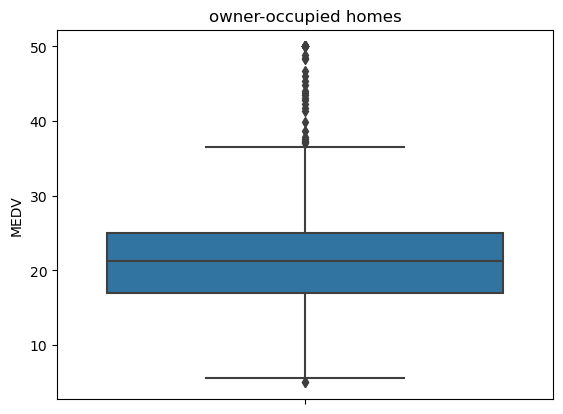

In [26]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y="MEDV", data = boston_df)
ax.set_title("owner-occupied homes")

Text(0.5, 1.0, 'Charles River variable')

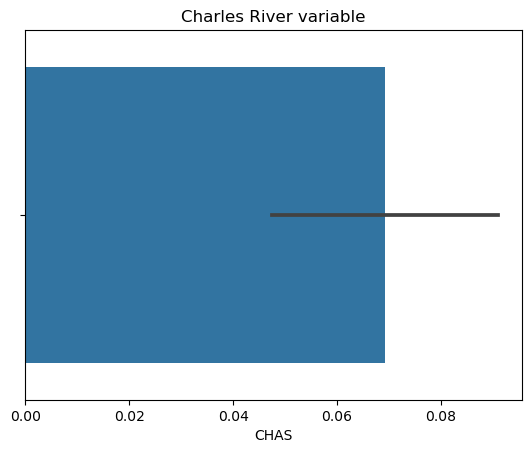

In [27]:
#Provide a  bar plot for the Charles river variable
ax1 = sns.barplot(data = boston_df, x="CHAS")
ax1.set_title("Charles River variable")

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

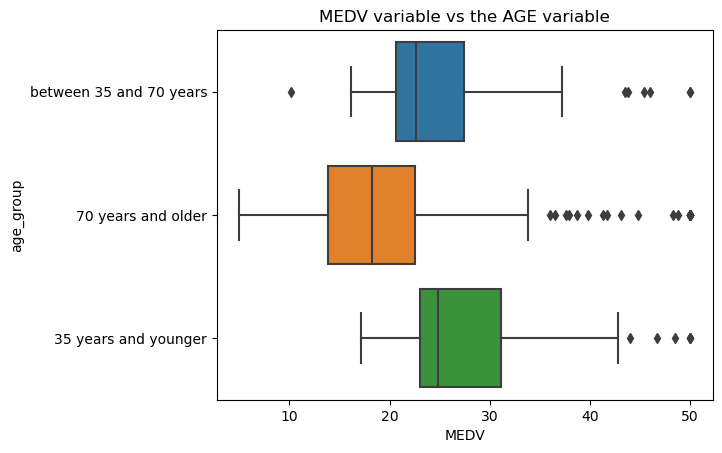

In [28]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df["AGE"] <= 35), "age_group"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "age_group"] = "70 years and older"

ax2 = sns.boxplot(x="MEDV", y="age_group", data = boston_df)
ax2.set_title("MEDV variable vs the AGE variable")

Text(0.5, 1.0, 'relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

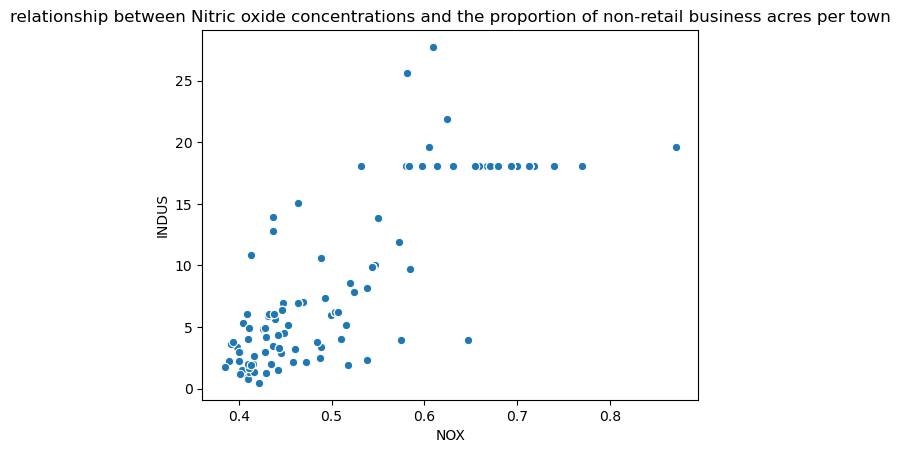

In [29]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax3 = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax3.set_title("relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")

When you have higher proportion of non-retail business acres per town it produces higher concentration of nitric oxide and the other way around.

In [30]:
#Create a histogram for the pupil to teacher ratio variable
ax4 = sns.histplot(boston_df, x="PTRATIO")
ax4.set_title("pupil to teacher ratio")

AttributeError: module 'seaborn' has no attribute 'histplot'

In [31]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
boston_df.loc[(boston_df["CHAS"] == 0), "T_test_CHAS"] = "not bounded"
boston_df.loc[(boston_df["CHAS"] == 1), "T_test_CHAS"] = "bounded"
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == "not bounded"]["MEDV"], boston_df[boston_df["CHAS"] == "bounded"]["MEDV"], equal_var = True)

Ttest_indResult(statistic=nan, pvalue=nan)

Ttest_indResult(statistic=nan, pvalue=nan)

In [41]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
lm = ols("MEDV" ~ "AGE", data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

SyntaxError: invalid syntax (4268889013.py, line 2)

In [42]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

(0.763651446920915, 7.913361061239593e-98)

Since pearson coefficient is 0.76 and pvalue is 7.913361061239593e-98 < 0.05, we reject null hypothesis. It seems that there is positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [45]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
x = boston_df["DIS"]
y = boston_df["MEDV"]

x = sm.add_constant(x)

model = sm.ols(y, x).fit()
predisction = model.predict(x)

model.summary()

AttributeError: module 'statsmodels.api' has no attribute 'ols'